# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Hiearchical Clustering</p>


<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">What is Hierarchical Clustering?

* Similar to other clustering algorithms, Hierarchical Clustering simply relies on measuring which data points are most similar to other data points.
* Similarity is defined by choosing a **distance metric**(e.g. euclidean, manhattan, cosine, etc).
* Why use Hiearchal Clustering?
    * Easy to understand and visualze.
    * Helps users decide how many clusters to choose.
    * Not necessary to choose cluster amount **before** running the algorithm.
* How does it works?: Devides points into **potential** clusters.
    * **Agglomerative Approach:** Each point begins as its own cluster, then clusters are joined.
    * **Divisive Approach:** All points begin in the same cluster, then clusters are split.

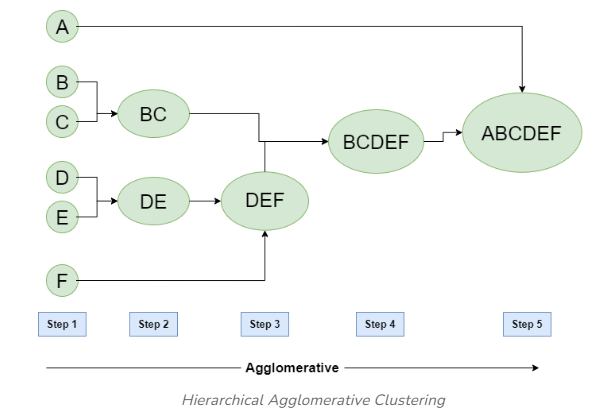

* **Hierarchical Clustering Process:**
    * Compare data points to find most similar data points to each other.
    * Merge these to create a cluster.
    * Compare clusters to find most simlar clusters and merge again.
    * Repeat until all points belong to a single cluster.
</div>

### Import Lİbraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cluster_mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [5]:
df["origin"].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

### Create Dummy Variables

During get_dummies process,, we can drop "name" column because it is not useful for the clustering model.

In [6]:
df_dummies = pd.get_dummies(df.drop("name", axis=1), dtype=int)

In [7]:
# Check the df with dummy variables
df_dummies 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


### Scale the Data

In [8]:
from sklearn.preprocessing import MinMaxScaler 

# range is betwween 0 and 1 in MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
# Since there is no "y" and Trand/Test data...

scaled_data = scaler.fit_transform(df_dummies)

In [11]:
scaled_data 

# all values are between 0 and 1

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

### Visualize

In [12]:
# Create a dataframe with these scaled values (between 0-1)
scaled_df = pd.DataFrame(scaled_data, columns=df_dummies.columns)

In [13]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


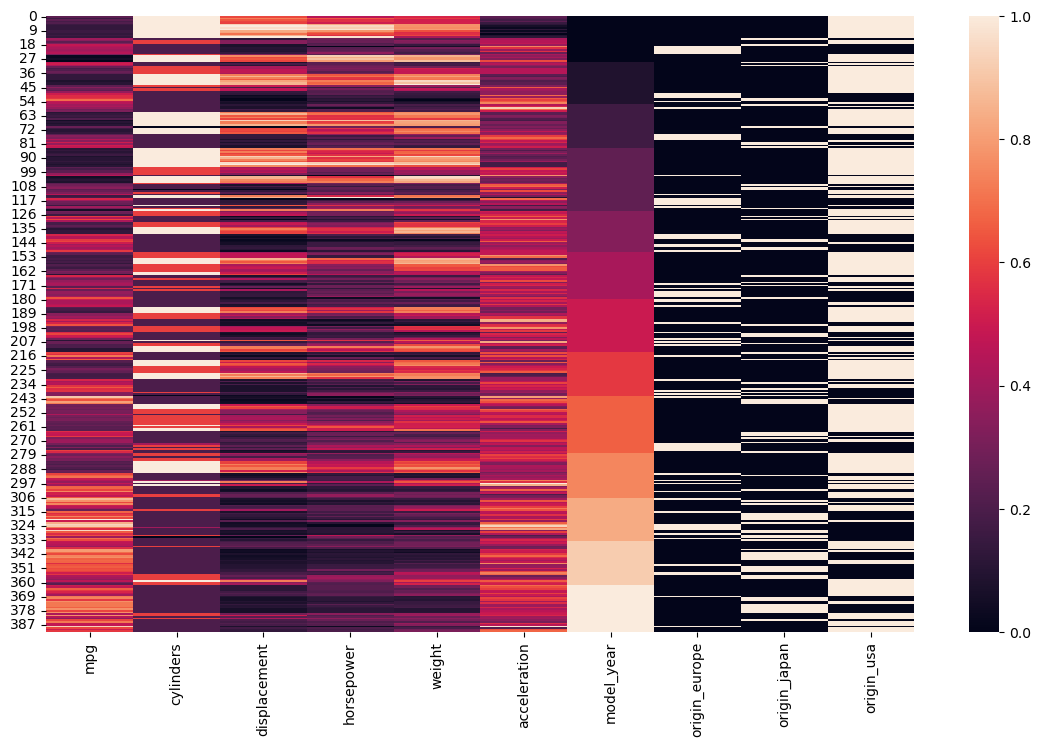

In [14]:
# Display it using heatmap

plt.figure(figsize=(14,8))
sns.heatmap(scaled_df);

**Display it using clustermap**

<Figure size 1400x800 with 0 Axes>

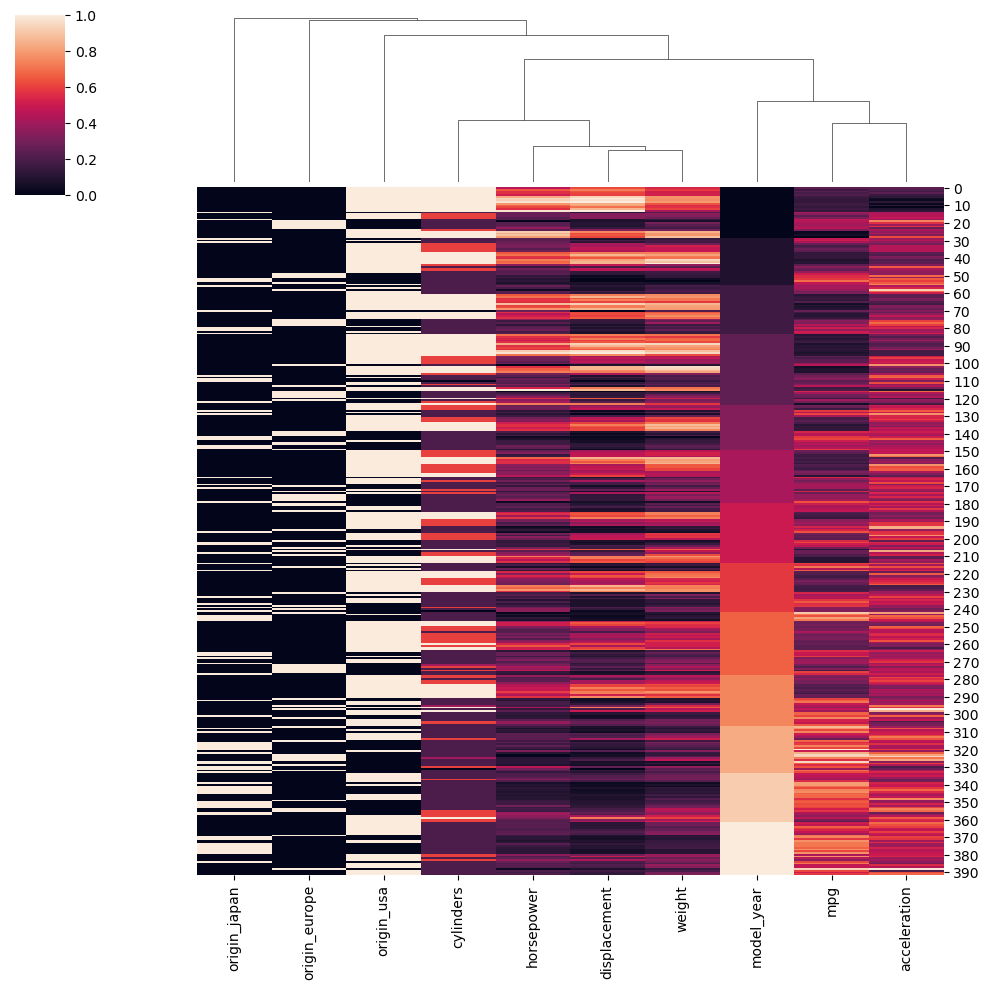

In [16]:
# Cluster according to columns
plt.figure(figsize=(14,8))
sns.clustermap(scaled_df, row_cluster=False);

<Figure size 1400x800 with 0 Axes>

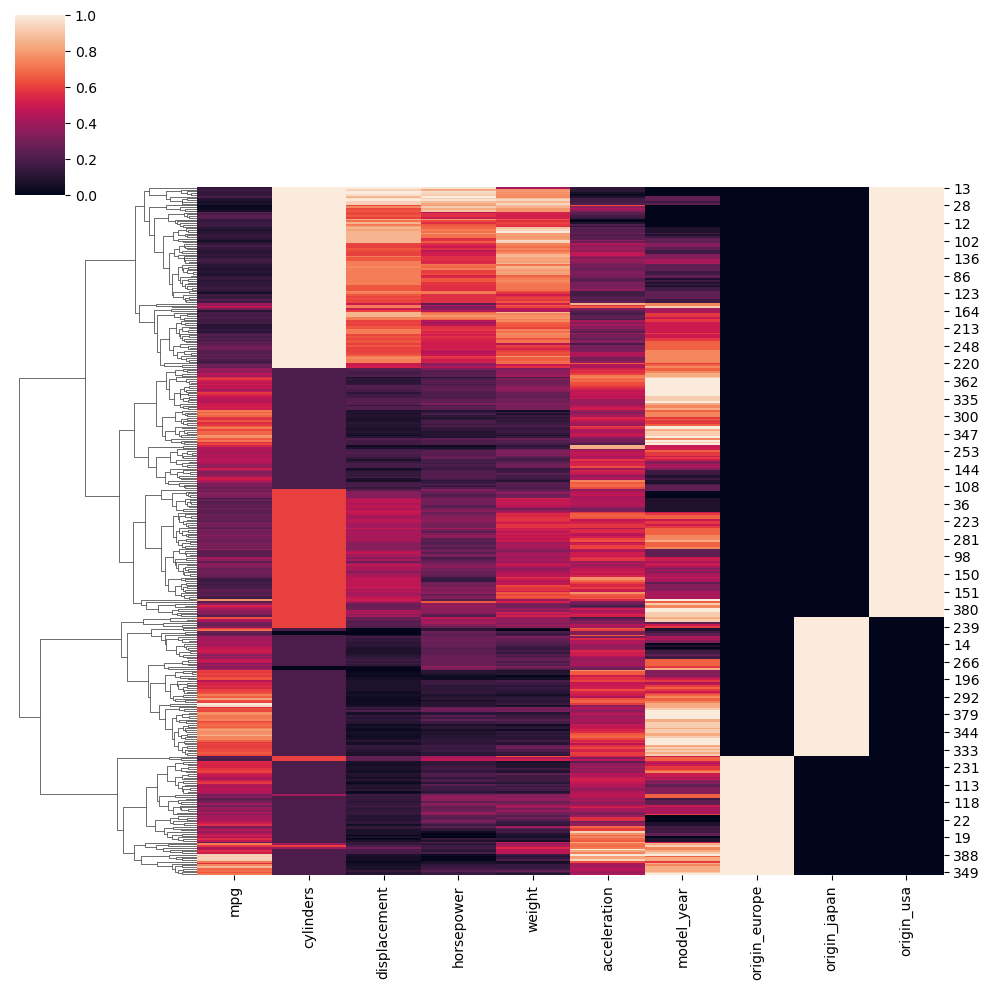

In [17]:
# Cluster according to rows
plt.figure(figsize=(14,8))
sns.clustermap(scaled_df, col_cluster=False);

**We can notice that when we cluster according to rows, it groups them using "origin" information: American cars vs others.**

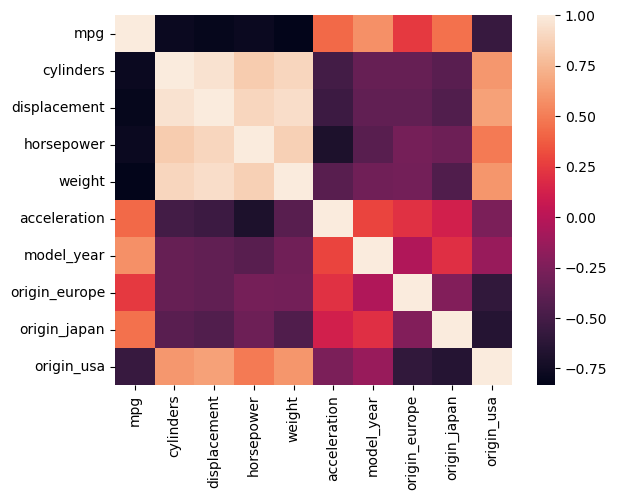

In [18]:
# Correlation heatmap
sns.heatmap(scaled_df.corr(numeric_only=True));

<div class="alert alert-block alert-success">
    
## <span style=" color:#eb346e">Using Scikit-Learn

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

**Linkage Parameter:** linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* **ward** minimizes the variance of the clusters being merged.

* **average** uses the average of the distances of each observation of the two sets.

* **complete** or **maximum** linkage uses the maximum distances between all observations of the two sets.

* **single** uses the minimum of the distances between all observations of the two sets.two sets.
</span>

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
# According to clustermas above, we can choose 4 clusters
model = AgglomerativeClustering(n_clusters=4)

In [21]:
# Our df is sclaed version (MinMax; between 0-1)
cluster_labels = model.fit_predict(scaled_df)

In [22]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

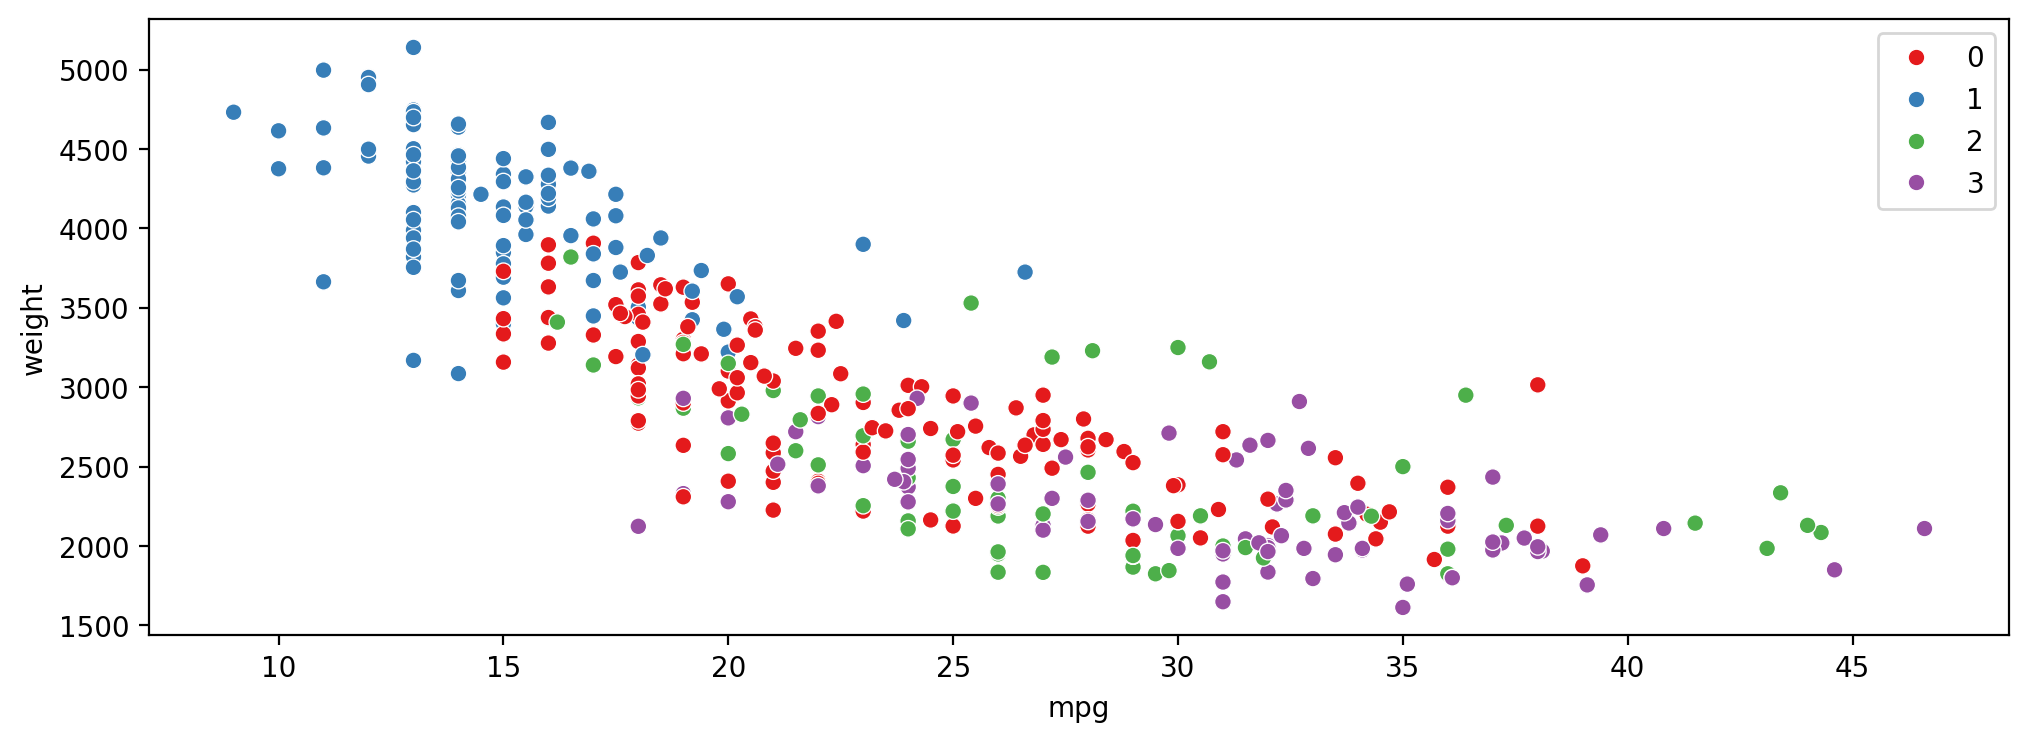

In [28]:
# Let's display these clusters on scatterplot in terms of mpg and weight 

plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg', y='weight', hue=cluster_labels, palette="Set1");

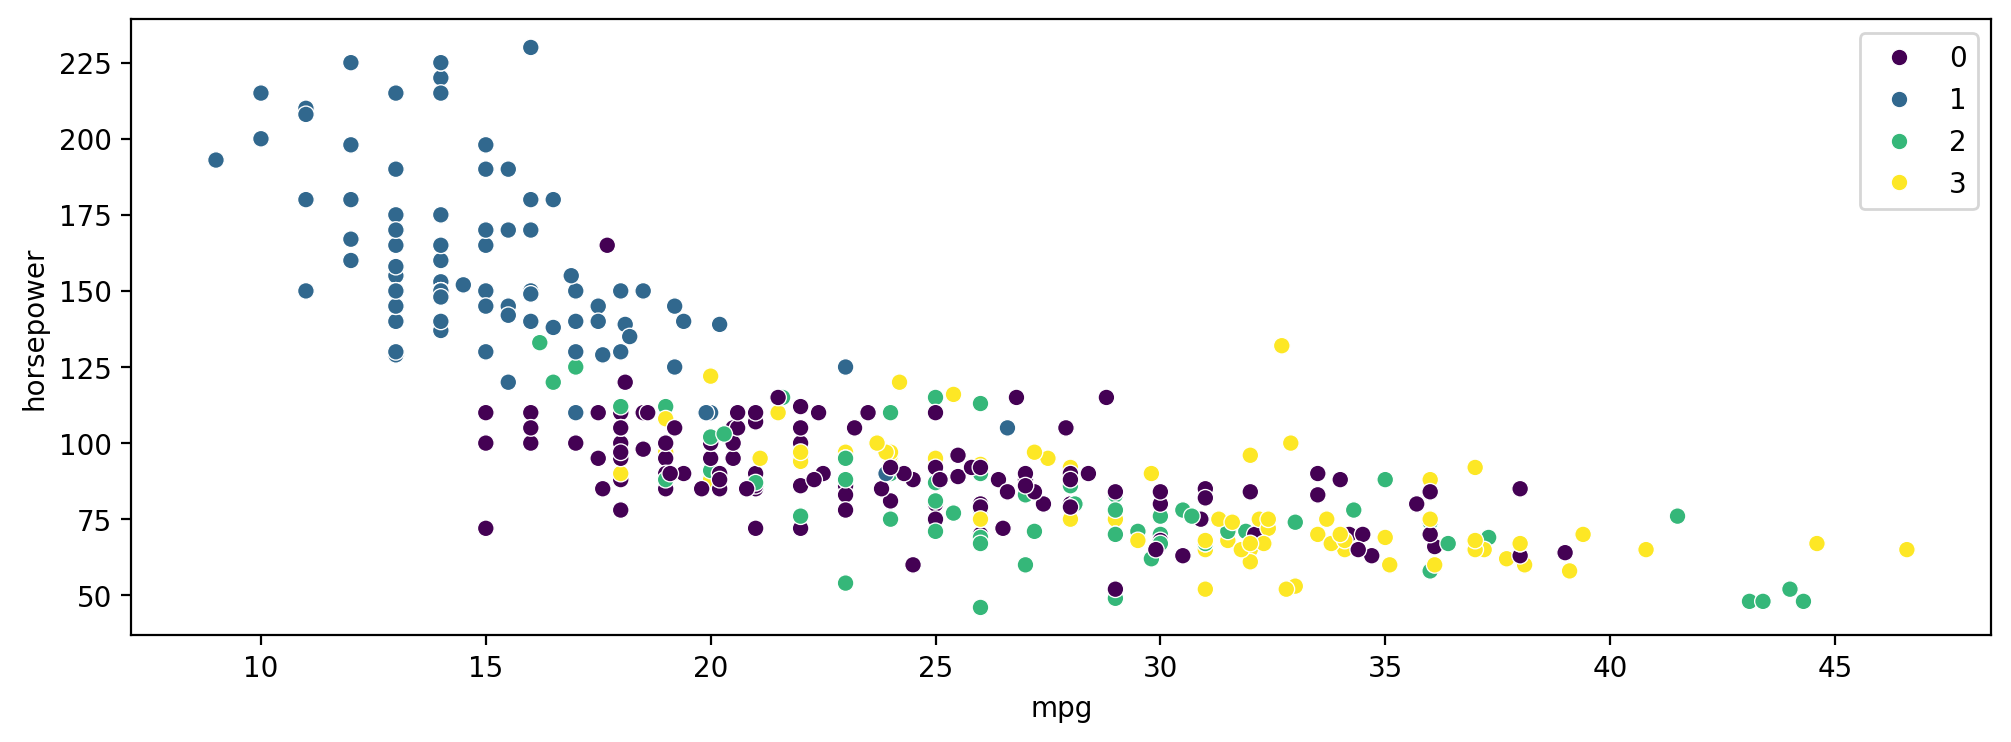

In [26]:
# Clusters in terms of mpg and horsepower

plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg', y='horsepower', hue=cluster_labels, palette="viridis");

## Exploring Number of Clusters with Dendrograms

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [29]:
# Max Distance Possible?
# sqrt(N_features)

In [30]:
len(scaled_df.columns)

10

In [31]:
# Max Distance Possible Between Two Points (in MinMax Scaling)
np.sqrt(10)

3.1622776601683795

#### Assuming every point has its own cluster

In [34]:
# Let's determine no cluster number: "n_clusters=None"

model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)


In [35]:
cluster_labels = model.fit_predict(scaled_df)

In [36]:
# Unique clusters for each point
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

### Linkage Model

In [37]:
# Import dendrogram and hierarchy from SciPy

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [39]:
linkage_matrix = hierarchy.linkage(model.children_)

In [40]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Interpretation of the matrix:** From left to right, the first two numbers (67 and 161) show the clusters (Remeber that the number of clusters equals the number of points here). Third one ( 1.41421356) shows the distance between them. For example, the last clusters (349, 779) have the distance of 75.32595834. It is clear on the dendrogram below. The last number (2) in the first row represents the number of points in this distance. 
</span>

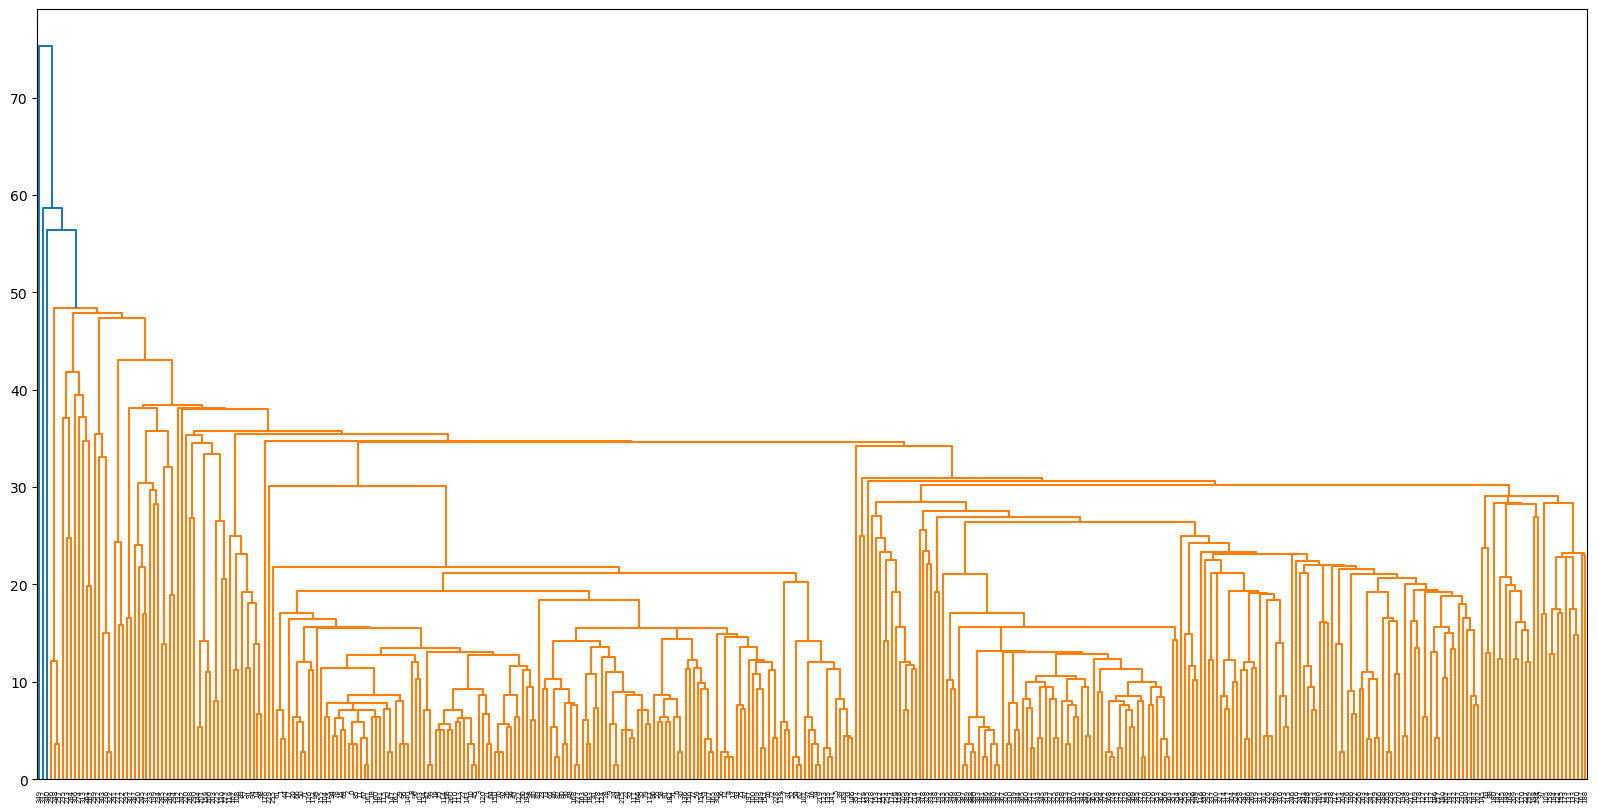

In [42]:
# Plot the dendrogram

plt.figure(figsize=(20,10))
dend = dendrogram(linkage_matrix)

#### Truncate the Dendrogram

#### use "lastp"

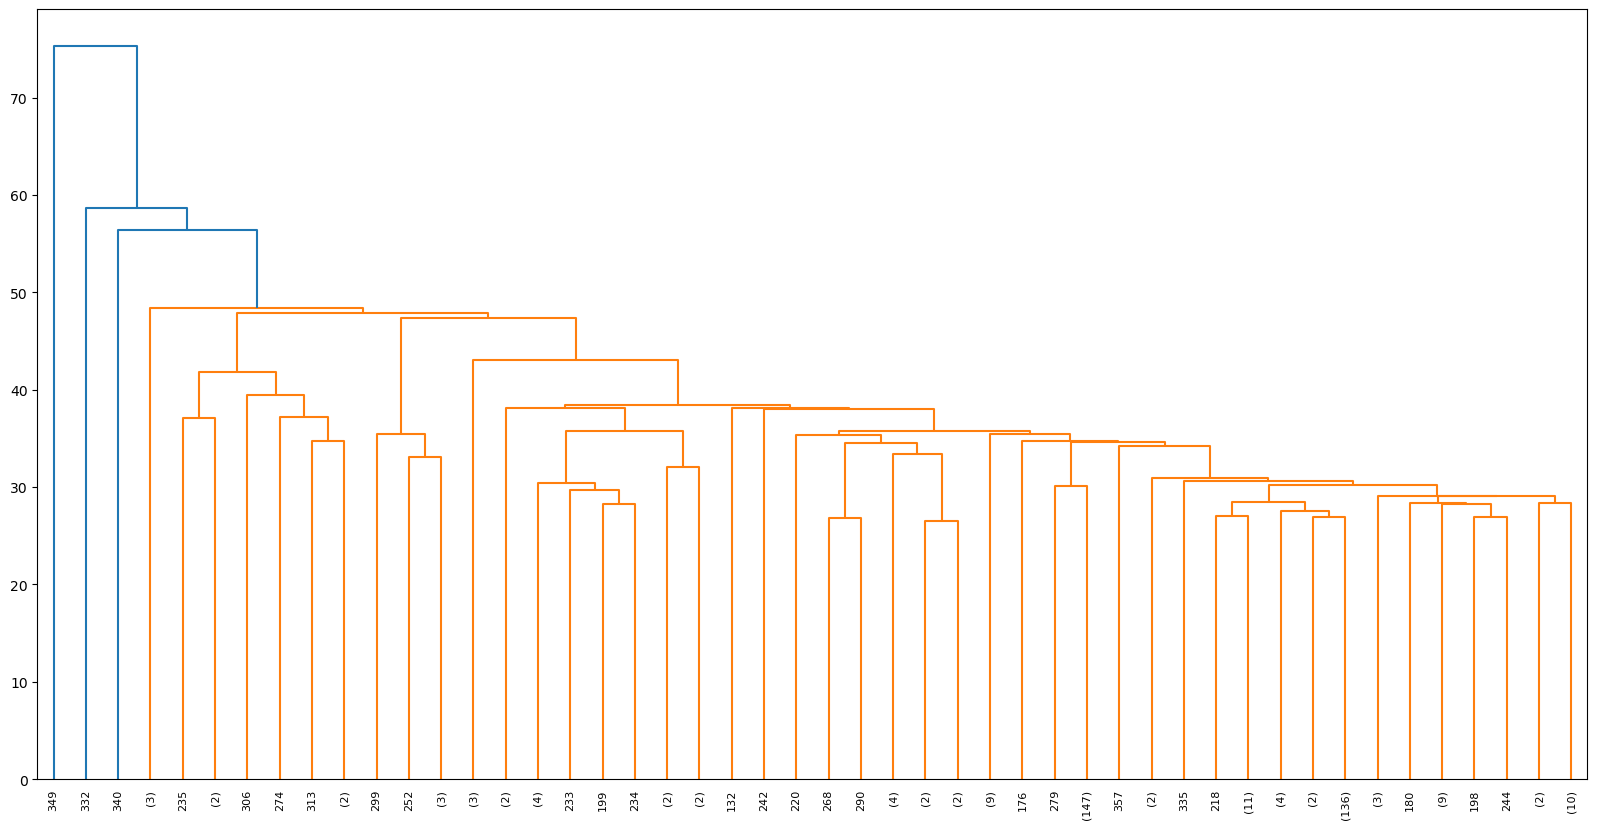

In [43]:
# For example p=48; it shows 48 points on the x axis

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

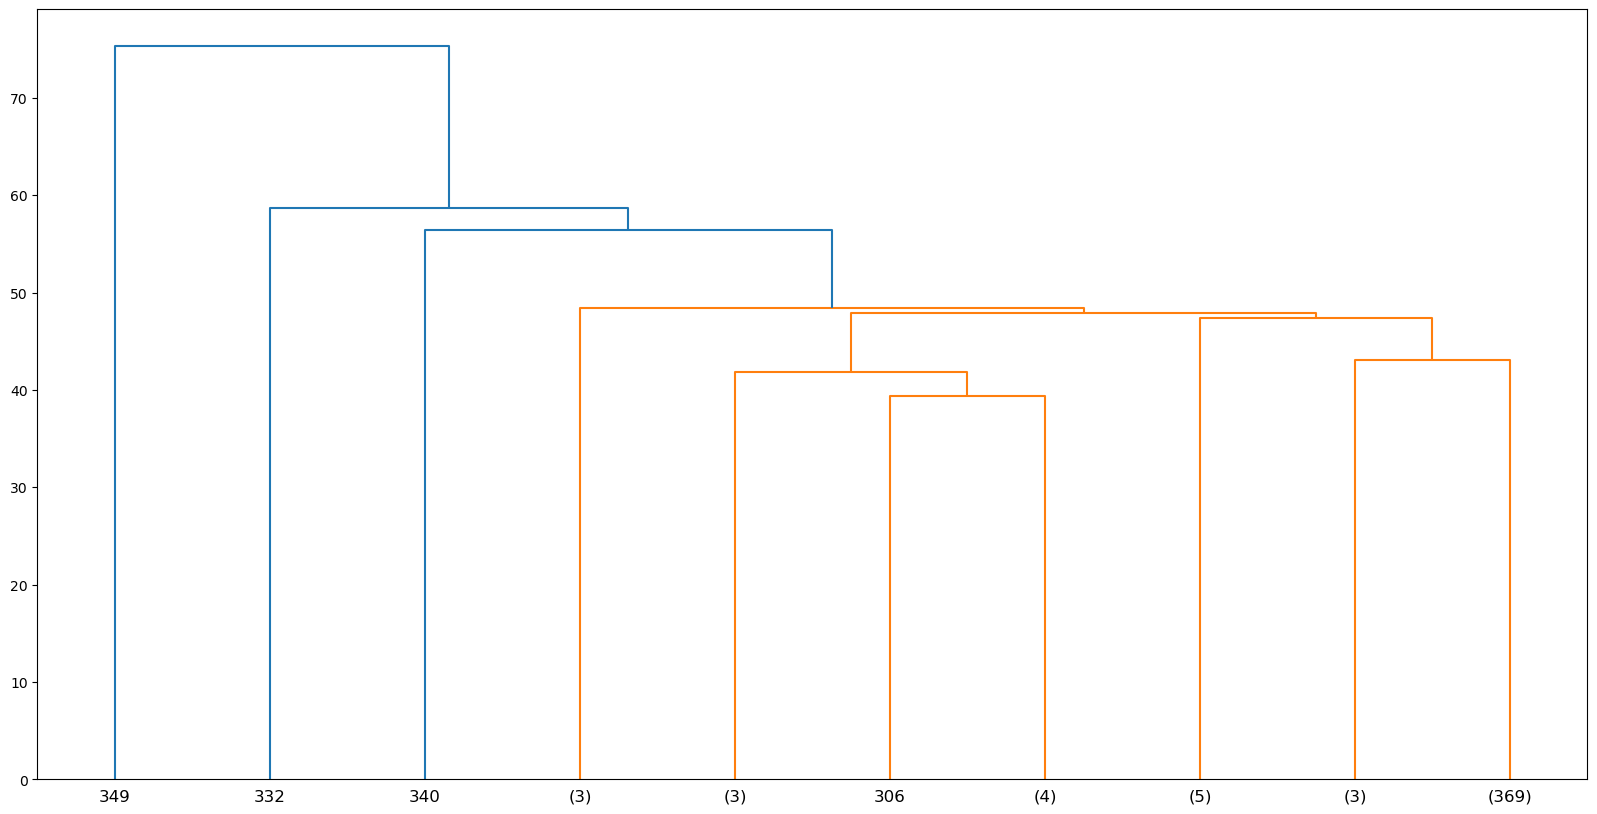

In [44]:
# For p=10
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp', p=10)

#### use "level""

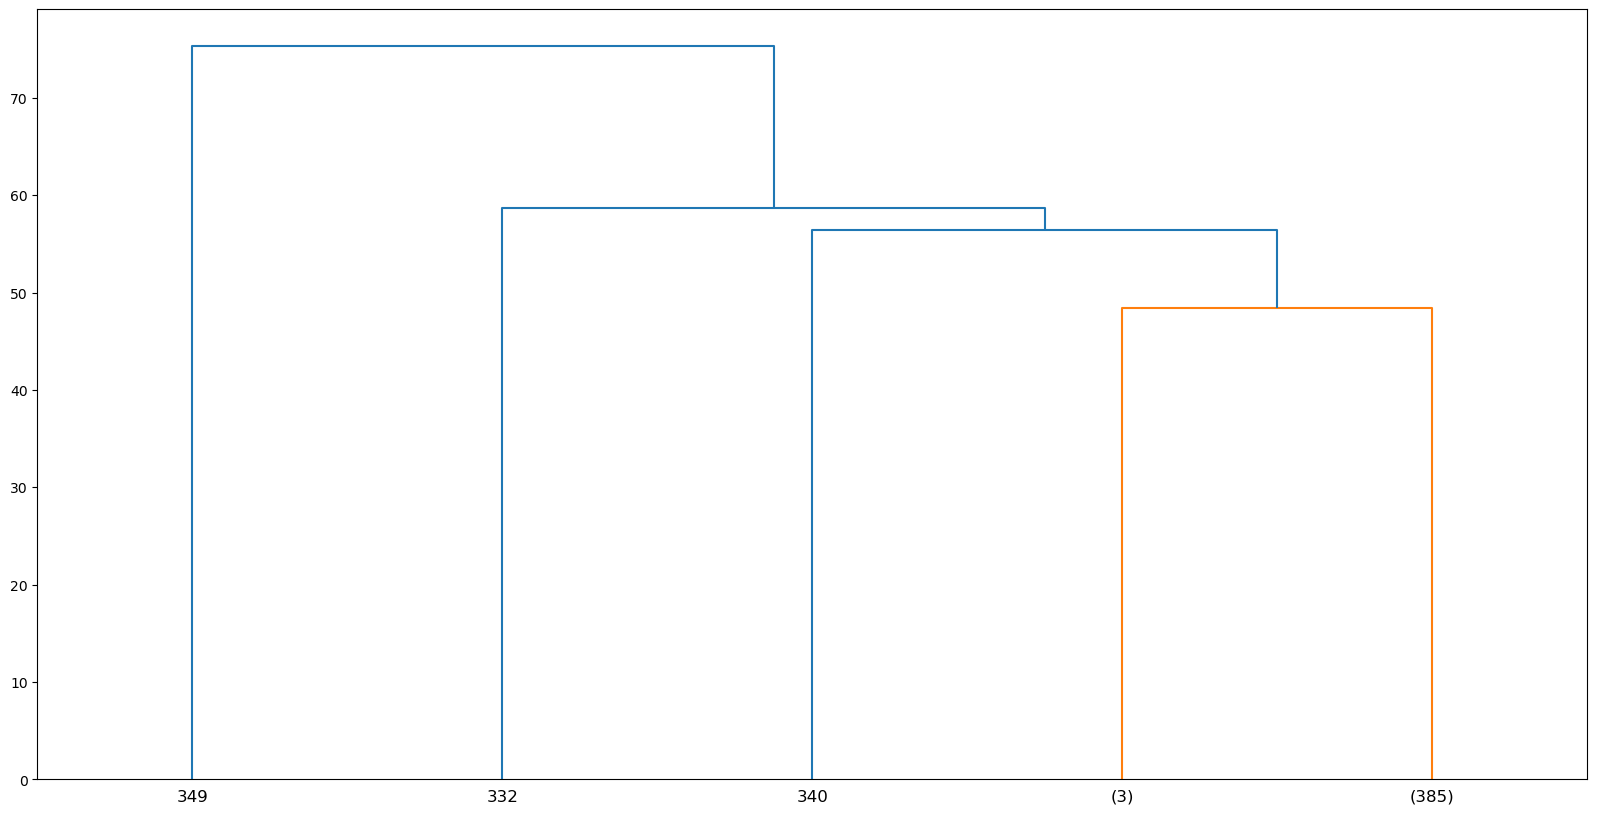

In [46]:
# For p=3; See the connection points of the dendograms 
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level', p=3)

### Choosing a Threshold Distance

**What is the distance between two points?**

In [47]:
scaled_df.describe()

# In Min Max Scaling min value is 0 and max value is 1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Index position for the gihest mpg (the most efficinet car)
scaled_df["mpg"].idxmax()

320

In [54]:
# index for min mpg (the most inefficient car)
scaled_df["mpg"].idxmin()

28

In [55]:
# What is the distance between these two points (the most efficient and the less efficient)

car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [56]:
# Euclidean distance 

distance = np.linalg.norm(car_a-car_b)
distance

2.3852929970374714

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Note:** This is the distance between points, not clusters. On the other hand, distance in linkage matrix was representing the distance between clusters (remember  1.41421356 or 75.32595834).
</span>

**Possible Maximum Distance in MinMax Scaling**

Euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance

In [58]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

### Creating a Model Based on Distance Threshold

**distance_threshold:** float, default=None

The linkage distance threshold at or above which clusters will not be merged.

 If not None, n_clusters must be None and compute_full_tree must be True.

In [60]:
# For distance treshold= 2 
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [62]:
# Fit and Predict
cluster_labels = model.fit_predict(scaled_data)

In [63]:
# See how many clusters are there
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [64]:
# 11 clusters (0-10)
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [ ]:
# Linkage Matrix
# linkage_matrix = hierarchy.linkage(model.children_)

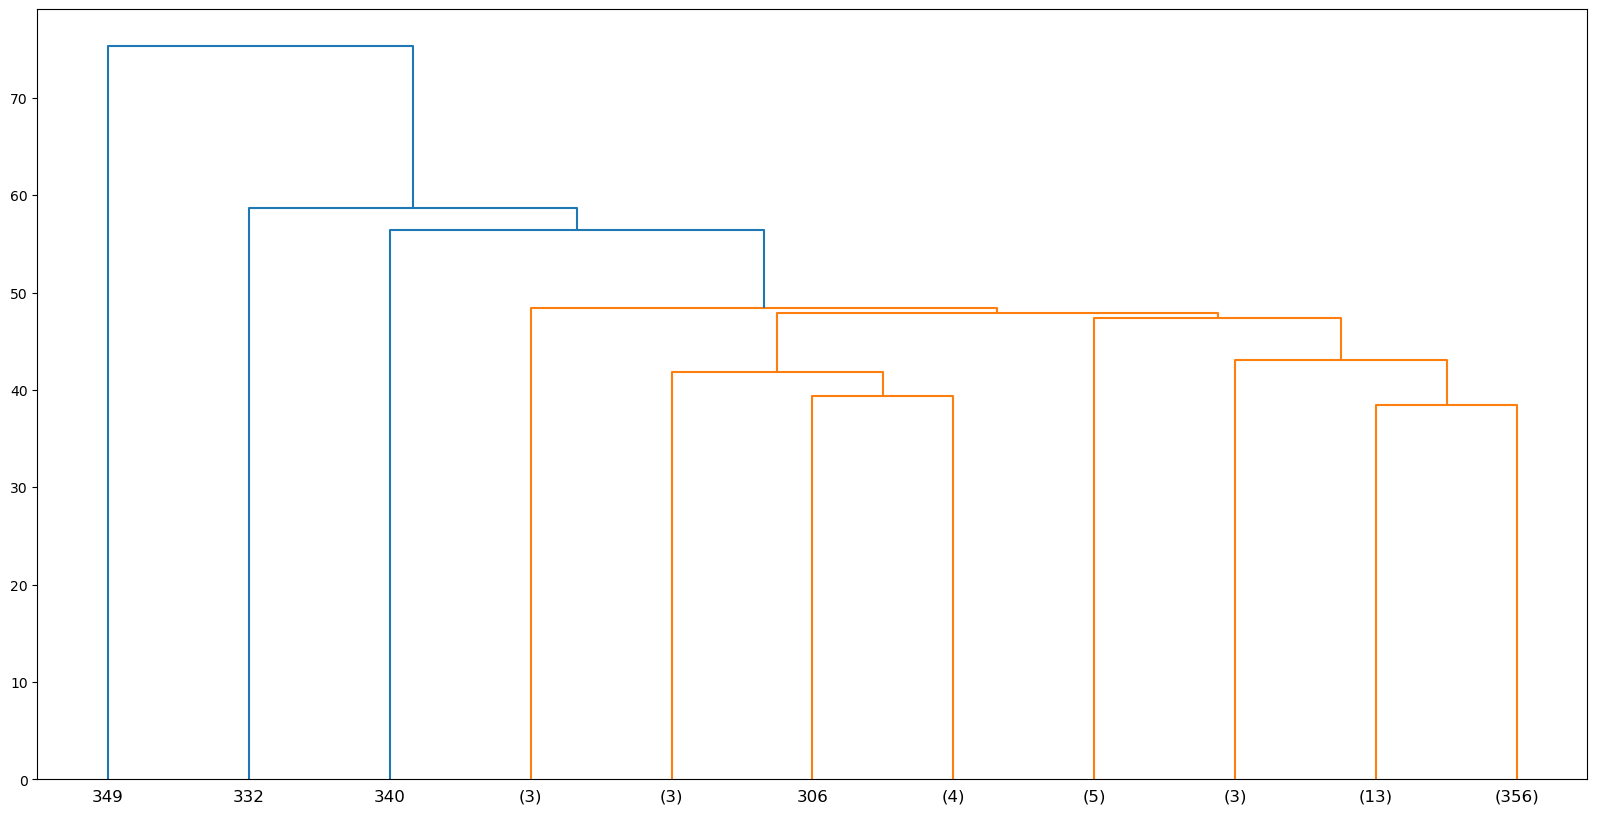

In [65]:
# Dendrogram for 11 clusters

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=11)